# 랜덤포레스트 예측모델 코드

##### #파일경로

In [1]:
# cd C:\MyTest\PJT4\결빙사고데이터

In [2]:
import numpy as np
import pandas as pd
import random

#여러변수출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#모델링
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from tqdm import tqdm
import seaborn as sns

#시각화
import matplotlib.pyplot as plt 
import matplotlib 
from matplotlib.colors import ListedColormap 
matplotlib.rcParams['axes.unicode_minus'] = False



##### 파일 불러오기

In [3]:
df = pd.read_csv('결빙사고데이터_최종전처리.csv', encoding='cp949')

In [4]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df

,일시,사고내용,기상상태,기온(°C),습도(%)
0,22,0,1.000,-3.6,99.9
1,2,0,1.342,-1.4,68.2
2,21,1,1.000,-5.3,50.1
3,16,1,1.000,-1.7,59.1
4,17,0,1.342,0.7,63.9
...,...,...,...,...,...
974,6,1,1.000,1.7,77.2
975,18,0,1.000,2.0,84.0
976,9,1,1.000,3.3,67.0
977,11,2,1.000,-1.2,64.5


##### 랜덤포레스트 코드

In [6]:
# 라벨과 데이터 변수로 구분하기 
y = df['사고내용']
x = df.drop('사고내용', axis=1)

In [7]:
# 학습 데이터 : 테스트 데이터 = 8:2
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

##### # 단일 하이퍼 파라미터에 대한 Grid search

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:47<00:00,  2.15s/it]


<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'the number of trees')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy Score')

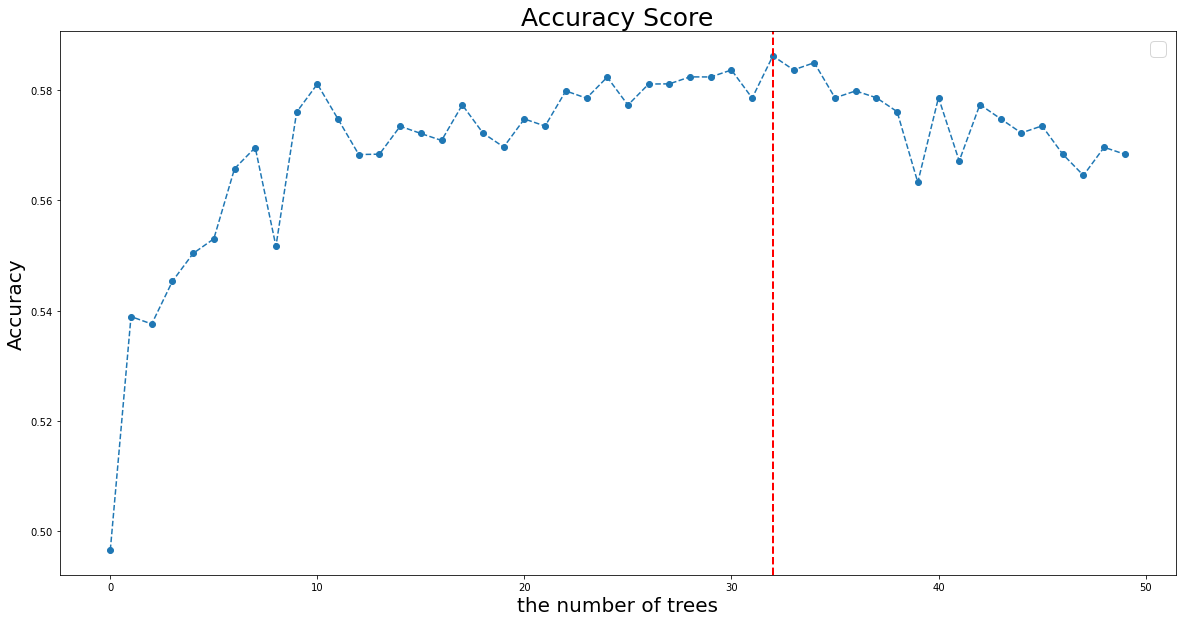

In [8]:
# 최적의 파라미터값 찾기

# n_estimators : 결정트리 개수, random_state = 2022 랜덤스탯 고정

cv_scores = []
estimator_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):
    model = RandomForestClassifier(n_estimators=i+1,
                                  n_jobs=-1,
                                  random_state=2022)
    score = cross_val_score(model, x_train, y_train, cv=10, scoring = 'accuracy').mean()
    cv_scores.append(score)
    
best_e = [estimator_list[i] for i in range(len(cv_scores)) if cv_scores[i]==np.max(cv_scores)]
plt.figure(figsize = (20,10))
plt.legend(["Cross validation scores"], fontsize=20)
plt.plot(estimator_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('the number of trees', fontsize=20)
plt.ylabel('Accuracy', fontsize=20) #정확도
plt.title('Accuracy Score', fontsize=25)
plt.axvline(best_e[0], color='r', linestyle='--', linewidth=2) # 가장 높은 정확도에 수직선 긋기
plt.savefig('Accuracy score.png',dpi=100)
plt.show()

In [9]:
print(f'최적 tree 개수:{(cv_scores.index(max(cv_scores)))+1}')
print('\n')
print('Train set에 대한 성능 (10fold cross validation)')
print(f'정확도:{max(cv_scores):0.4f}')

최적 tree 개수:33


Train set에 대한 성능 (10fold cross validation)
정확도:0.5861


In [10]:
model = RandomForestClassifier(n_estimators=16, n_jobs=-1 ,random_state=2022) 
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

# Train set에 대한 성능 확인하기
y_pred = model.predict(x_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print('Train set에 대한 성능')
print(f'정확도:{acc:0.4f}')

# Test set에 대한 성능 확인하기
y_pred = model.predict(x_test) 
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print('Test set에 대한 성능')
print(f'정확도:{acc:0.4f}')

RandomForestClassifier(n_estimators=16, n_jobs=-1, random_state=2022)

Train set에 대한 성능
정확도:0.9847


Test set에 대한 성능
정확도:0.5765


## 모델 성능 측정

In [11]:
plt.rc("font", family="Malgun Gothic")

<Figure size 2880x720 with 0 Axes>

Text(0.5, 1.0, 'Random Forest 성능 측정')

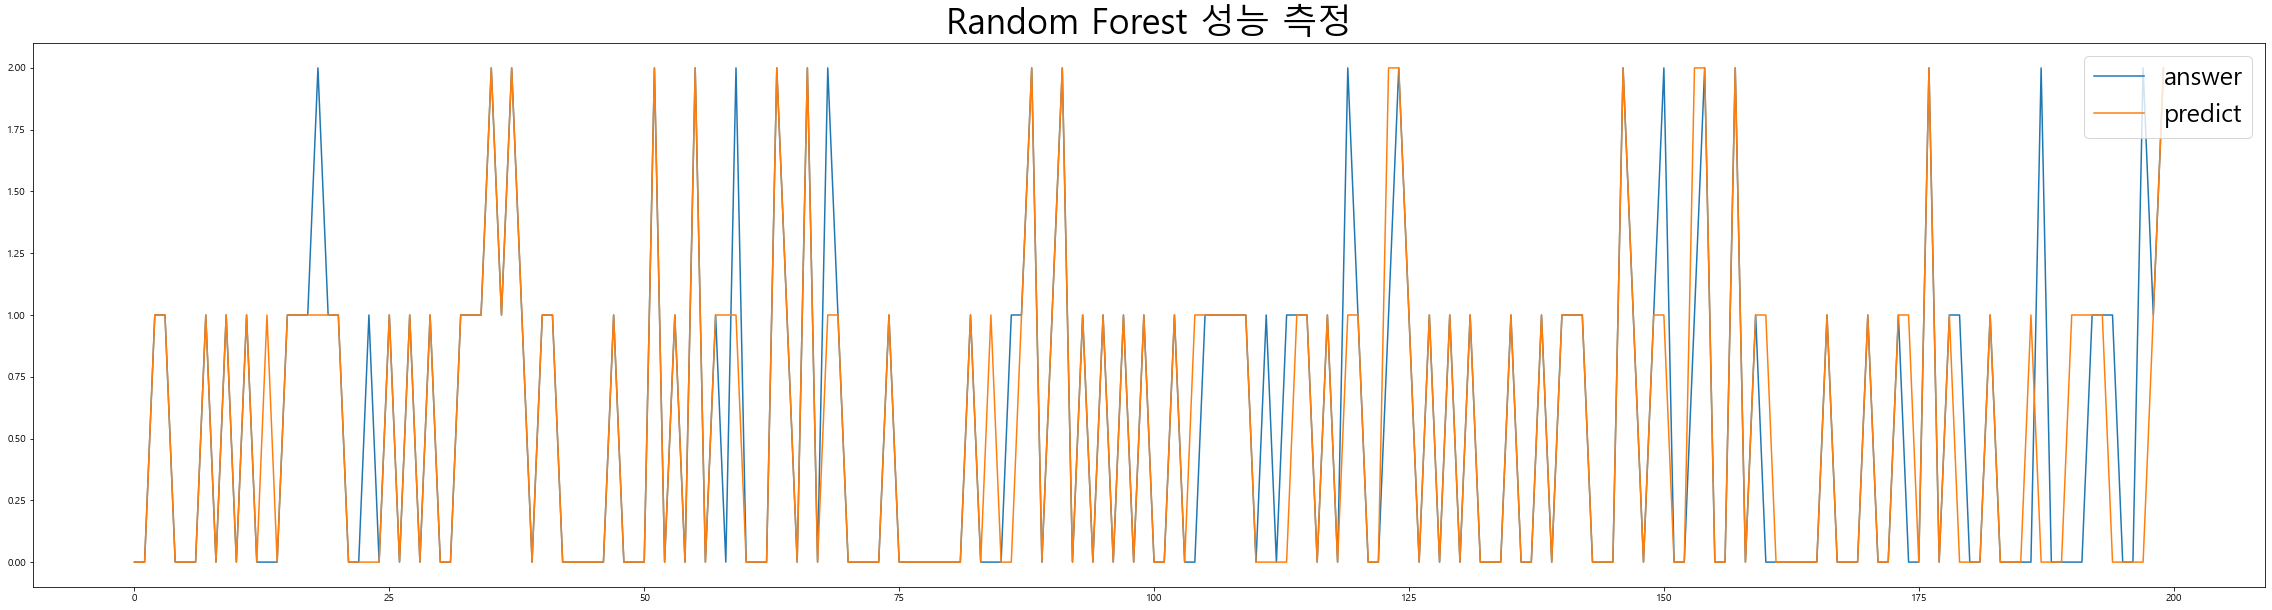

In [23]:
y1 = y.sample(n=200)

answer = pd.DataFrame(y[:200].reset_index())
del answer["index"]

plt.figure(figsize=(40,10))
plt.plot(answer, label="answer")
plt.plot(model.predict(x[:200]), label="predict")

plt.title("Random Forest 성능 측정",fontsize=35)
plt.legend(loc='upper right',fontsize=25)
plt.savefig('Random Forest 성능.png',dpi=100)

plt.show()

In [13]:
y1 = y.sample(n=200)
df1 = pd.DataFrame(y1,columns=['사고내용'])

In [14]:
df1['사고내용'].value_counts()

0    105
1     75
2     20
Name: 사고내용, dtype: int64

In [15]:
x

,일시,기상상태,기온(°C),습도(%)
0,22,1.000,-3.6,99.9
1,2,1.342,-1.4,68.2
2,21,1.000,-5.3,50.1
3,16,1.000,-1.7,59.1
4,17,1.342,0.7,63.9
...,...,...,...,...
974,6,1.000,1.7,77.2
975,18,1.000,2.0,84.0
976,9,1.000,3.3,67.0
977,11,1.000,-1.2,64.5


## 특성 중요도 시각화

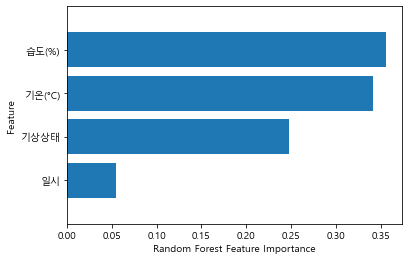

In [16]:
def plot_feature_importance(model):
    n_features = x.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.savefig('Feature importance.png',dpi=100)
    
plot_feature_importance(model)